In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
domain = 4
element_size = 0.461
fig_size = (10, 6)
j_integral_ylim = (6.75, 8.75)
j_integral_yticks = np.arange(7.0, 9.0, 0.5)

In [4]:
df = pd.read_csv("results_data_summary.csv")

df_mesh = df.loc[df["study_type"] == "mesh_sensitivity"]
df_crack = df.loc[df["study_type"] == "crack_length"]
df_weight = df.loc[df["study_type"] == "weight_functions"]

df_domain = df_mesh.loc[df_mesh["minimum_element_size_mm"] == element_size]
df_mesh = df_mesh.loc[df_mesh["domain_id"] == domain]
df_crack = df_crack.loc[df_crack["domain_id"] == domain]
df_weight = df_weight.loc[df_weight["minimum_element_size_mm"] == element_size]

df_mesh_2d = df_mesh.loc[df_mesh["dimension"] == "2d"]
df_crack_2d = df_crack.loc[df_crack["dimension"] == "2d"]
df_domain_2d = df_domain.loc[df_domain["dimension"] == "2d"]
df_weight_2d = df_weight.loc[df_weight["dimension"] == "2d"]

df_mesh_3d = df_mesh.loc[df_mesh["dimension"] == "3d"]
df_crack_3d = df_crack.loc[df_crack["dimension"] == "3d"]
df_domain_3d = df_domain.loc[df_domain["dimension"] == "3d"]
df_weight_3d = df_weight.loc[df_weight["dimension"] == "3d"]

In [5]:
def polynomial_fit(x, y, degree=2, num_points=200):
    """
    Returns a smooth x array (x_fit) and the corresponding polynomial-fitted y (y_fit)
    given data x, y and a chosen polynomial degree.
    """
    # Sort x and y to ensure a smooth line in ascending order
    sort_idx = np.argsort(x)
    x_sorted, y_sorted = x[sort_idx], y[sort_idx]
    coeffs = np.polyfit(x_sorted, y_sorted, deg=degree)
    x_fit = np.linspace(x_sorted.min(), x_sorted.max(), num_points)
    y_fit = np.polyval(coeffs, x_fit)
    
    return x_fit, y_fit

In [6]:
plot_configs_mesh_sensitivity = [
    {
        "title": "J-integral (N mm^-1) vs. Crack Tip Element Size (mm) for 2D and 3D Models",
        "ylabel": "J-integral (N mm^-1)",
        "y_analytical": "j_integral_value_analytical",
        "y_calculated": "j_integral_value_calculated",
        "x_lim": (0.05, 1.55),
        "xticks": np.arange(0.1, 1.7, 0.2),
        "y_lim": (7.5, 8.5),
        "yticks": np.arange(7.5, 8.75, 0.25),
        "filename": "j_integral_vs_mesh.png"
    },
    {
        "df": df_mesh_2d,
        "title": "Stress Intensity Factor (MPa √mm) vs Crack Tip Element Size (mm) for 2D and 3D Models",
        "ylabel": "Stress Intensity Factor (SIF)",
        "y_analytical": "stress_intensity_factor_value_analytical",
        "y_calculated": "stress_intensity_factor_value_calculated",
        "x_lim": (0.1, 1.5),
        "xticks": np.arange(0.1, 1.7, 0.2),
        "y_lim": (730, 780),
        "yticks": np.arange(740, 780, 10),
        "filename": "sif_vs_mesh.png"
    }
]

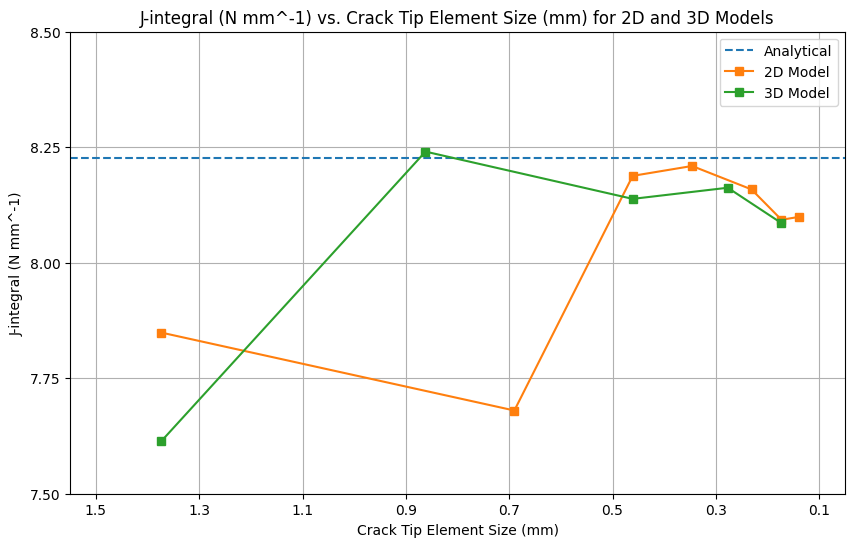

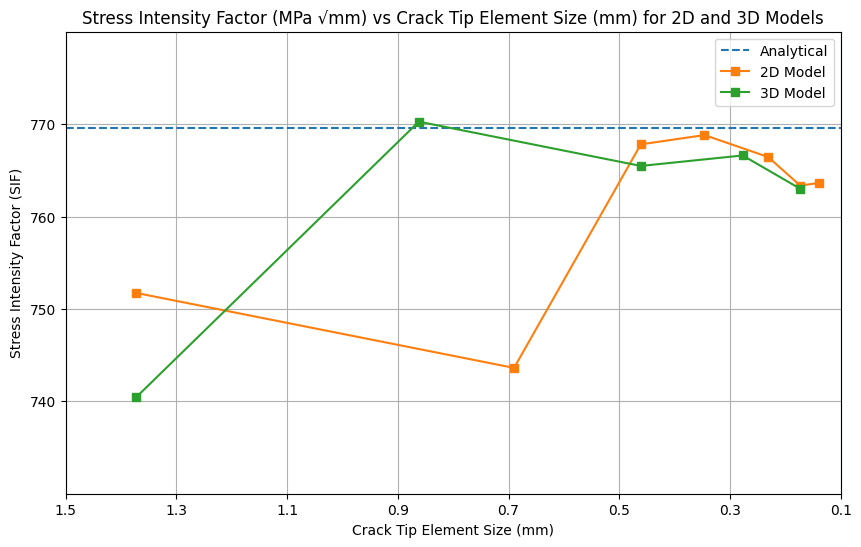

In [7]:
for config in plot_configs_mesh_sensitivity:
    plt.figure(figsize=fig_size)

    x_2d = df_mesh_2d["minimum_element_size_mm"].values
    sort_idx_2d = np.argsort(x_2d)[::-1]
    x_2d = x_2d[sort_idx_2d]

    x_3d = df_mesh_3d["minimum_element_size_mm"].values
    sort_idx_3d = np.argsort(x_3d)[::-1]
    x_3d = x_3d[sort_idx_3d]

    y_ana = df_mesh_2d[config["y_analytical"]].values[sort_idx_2d]
    y_cal_2d = df_mesh_2d[config["y_calculated"]].values[sort_idx_2d]
    y_cal_3d = df_mesh_3d[config["y_calculated"]].values[sort_idx_3d]
    
    plt.axhline(y=y_ana[0], linestyle="--", label="Analytical", color="C0")
    plt.plot(x_2d, y_cal_2d, marker="s", linestyle="-", label="2D Model", color="C1")        
    
    x_fit_cal_2d, y_fit_cal_2d = polynomial_fit(x_2d, y_cal_2d, degree=3)
    #plt.plot(x_fit_cal_2d, y_fit_cal_2d, "-", color="C1")  

    plt.plot(x_3d, y_cal_3d, marker="s", linestyle="-", label="3D Model", color="C2")

    x_fit_cal_3d, y_fit_cal_3d = polynomial_fit(x_3d, y_cal_3d, degree=2)
    #plt.plot(x_fit_cal_3d, y_fit_cal_3d, "-", color="C2") 

    plt.xlabel("Crack Tip Element Size (mm)")
    plt.ylabel(config["ylabel"])
    plt.ylim(config["y_lim"])
    plt.xlim(config["x_lim"])
    plt.xticks(config["xticks"])
    plt.yticks(config["yticks"])
    plt.gca().invert_xaxis()
    plt.title(config["title"])
    plt.grid(True)
    plt.legend()
    plt.savefig(f"plots/{config["filename"]}", dpi=300, bbox_inches='tight');
    plt.show();

    

In [8]:
plot_configs_domain = [
    {
        "title": "J-integral ($N\ mm^{-1}$) vs. Integration Domain for 2D and 3D Models with a 10 mm Edge Crack",
        "y_ana": "j_integral_value_analytical",
        "y_cal": "j_integral_value_calculated",
        "y_err": "j_integral_error_percentage",
        "ylabel": "J-integral ($N\ mm^{-1}$)",
        "ylim": j_integral_ylim,
        "yticks": j_integral_yticks,
        "filename": "j_integral_vs_domain.png"
    },
    {
        "title": "SIF vs. Domain ID",
        "y_ana": "stress_intensity_factor_value_analytical",
        "y_cal": "stress_intensity_factor_value_calculated",
        "y_err": "stress_intensity_factor_error_percentage",
        "ylabel": "Stress Intensity Factor (SIF)",
        "ylim": (700, 800),
        "yticks": np.arange(700, 825, 25),
        "filename": "sif_vs_domain.png"
    }
]

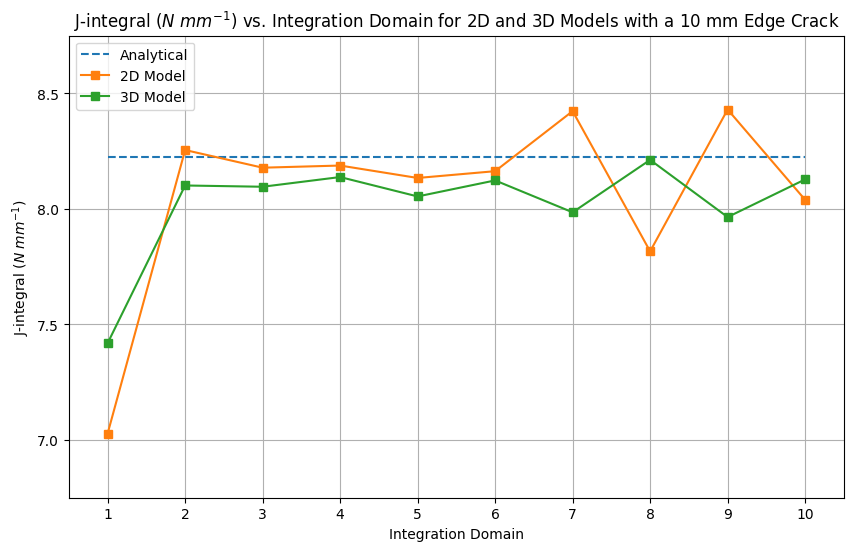

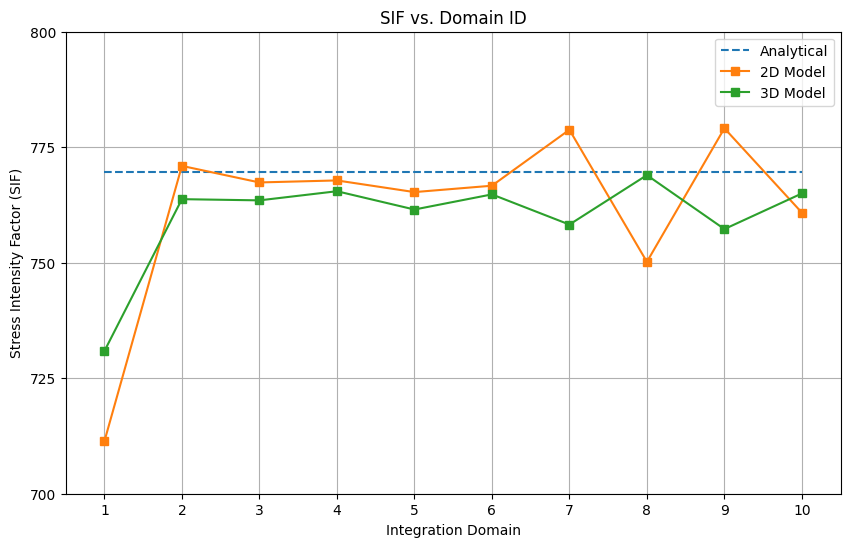

In [9]:

for config in plot_configs_domain:

    plt.figure(figsize=fig_size)
    
    x_2d = df_domain_2d["domain_id"].values
    x_3d = df_domain_3d["domain_id"].values

    sort_idx_2d = np.argsort(x_2d)
    sort_idx_3d = np.argsort(x_3d)

    y_ana = df_domain_2d[config["y_ana"]].values[sort_idx_2d]
    y_cal_2d = df_domain_2d[config["y_cal"]].values[sort_idx_2d]
    y_err_2d = df_domain_2d[config["y_err"]].values[sort_idx_2d]
    y_cal_3d = df_domain_3d[config["y_cal"]].values[sort_idx_3d]
    y_err_3d = df_domain_3d[config["y_err"]].values[sort_idx_3d]
        
    # Plot lines with markers for both Analytical and Calculated
    plt.plot(x_2d, y_ana, linestyle="--", label="Analytical")
    plt.plot(x_2d, y_cal_2d, marker="s", linestyle="-", label="2D Model")
    plt.plot(x_3d, y_cal_3d, marker="s", linestyle="-", label="3D Model")
    
    plt.xlabel("Integration Domain")
    plt.xticks(np.arange(1, 11, 1))
    plt.xlim(0.5, 10.5)
    plt.ylabel(config["ylabel"])
    plt.title(config["title"])
    plt.ylim(config["ylim"])
    plt.yticks(config["yticks"])
    plt.legend()
    plt.grid(True)
    plt.savefig(f"plots/{config["filename"]}", dpi=300, bbox_inches='tight');
    plt.show();

In [10]:
plot_configs_weight = [
    {
        "title": "J-integral ($N\ mm^{-1}$) vs. Integration Domain for 2D and 3D Models Using Three Weight Functions",
        "y_ana": "j_integral_value_analytical",
        "y_cal": "j_integral_value_calculated",
        "y_err": "j_integral_error_percentage",
        "ylabel": "J-integral ($N\ mm^{-1}$)",
        "ylim": j_integral_ylim,
        "yticks": j_integral_yticks,
        "filename": "j_integral_vs_weight.png"
    },
    {
        "title": "SIF vs. Domain ID",
        "y_ana": "stress_intensity_factor_value_analytical",
        "y_cal": "stress_intensity_factor_value_calculated",
        "y_err": "stress_intensity_factor_error_percentage",
        "ylabel": "Stress Intensity Factor (SIF)",
        "ylim": (690, 810),
        "yticks": np.arange(700, 825, 25),
        "filename": "sif_vs_weight.png"
    }
]

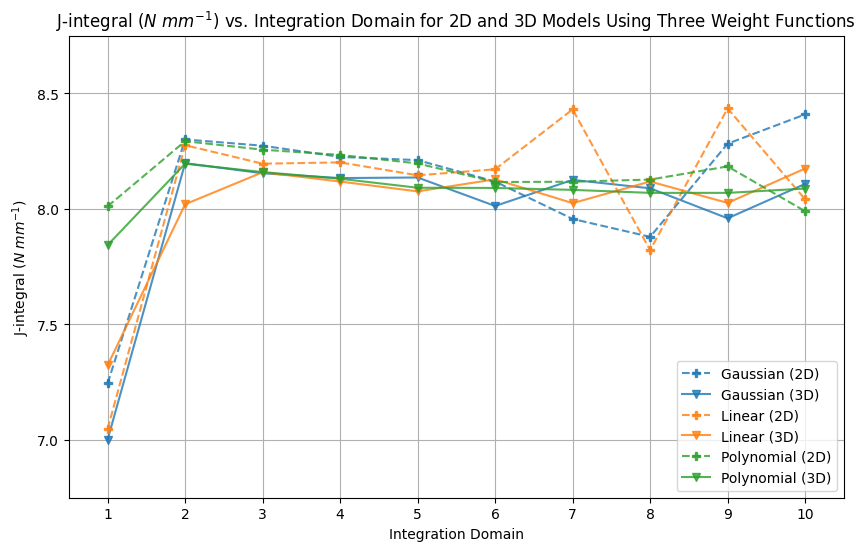

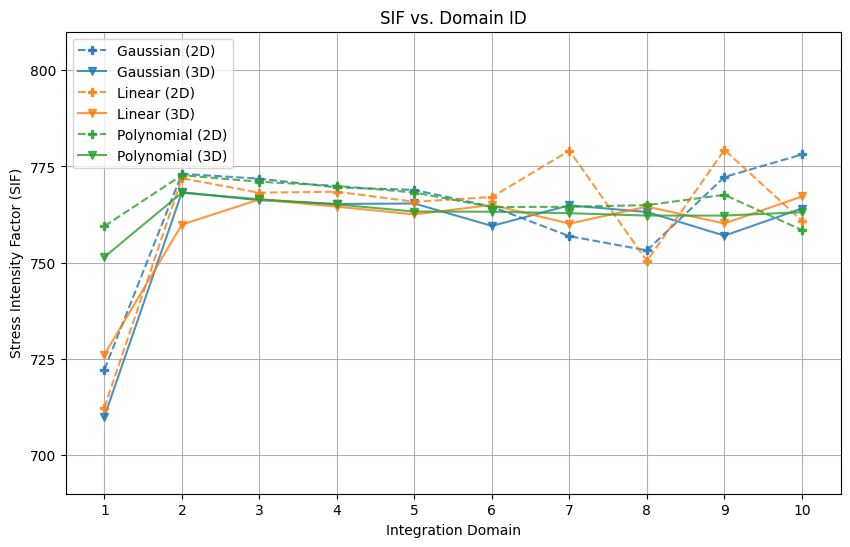

In [11]:
colours = ("C0", "C1", "C2")

for config in plot_configs_weight:

    i = 0
    plt.figure(figsize=fig_size)
    
    for wf in df_weight_2d["weight_function_type"].unique():

        colour = colours[i]
        df2d_sub = df_weight_2d[df_weight_2d["weight_function_type"] == wf]
        df3d_sub = df_weight_3d[df_weight_3d["weight_function_type"] == wf]
        
        x_2d = df2d_sub["domain_id"].values
        x_3d = df3d_sub["domain_id"].values

        sort_idx_2d = np.argsort(x_2d)
        sort_idx_3d = np.argsort(x_3d)

        x_2d = x_2d[sort_idx_2d]
        x_3d = x_3d[sort_idx_3d]
        
        y_ana = df2d_sub[config["y_ana"]].values[sort_idx_2d]
        y_cal_2d = df2d_sub[config["y_cal"]].values[sort_idx_2d]
        y_cal_3d = df3d_sub[config["y_cal"]].values[sort_idx_3d]
                
        plt.plot(x_2d, y_cal_2d,  color=colour, marker="P", alpha=0.8, linestyle="--", label=f"{wf.title()} (2D)")
        plt.plot(x_3d, y_cal_3d,  color=colour, marker="v", alpha=0.8, linestyle="-", label=f"{wf.title()} (3D)")

        i+=1

    #plt.plot(x_2d, y_ana, linestyle="--", label=f"Analytical ({wf})")
    plt.xlabel("Integration Domain")
    plt.ylabel(config["ylabel"])
    plt.xticks(np.arange(1, 11, 1))
    plt.xlim(0.5, 10.5)
    plt.title(config["title"])
    plt.ylim(config["ylim"])
    plt.yticks(config["yticks"])
    plt.legend()
    plt.grid(True)
    plt.savefig(f"plots/{config['filename']}", dpi=300, bbox_inches='tight')
    plt.show()

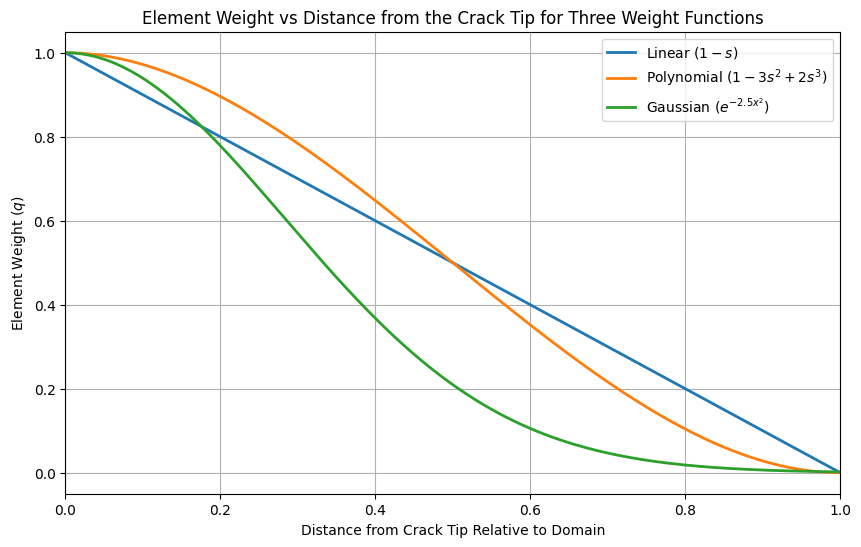

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normalized variable s, equivalent to (r - r_min)/(r_max - r_min)
s = np.linspace(0, 1, 200)

# Linear weight function: q = 1 - s
q_linear = 1 - s

# Polynomial weight function: q = 1 - 3*s^2 + 2*s^3
q_poly = 1 - 3 * s**2 + 2 * s**3

# Gaussian weight function: q = exp(-(s/sigma)^2) with sigma=0.4
sigma = 0.4
q_gaussian = np.exp(-(s / sigma)**2)

plt.figure(figsize=fig_size)
plt.plot(s, q_linear, label="Linear ($1-s$)", lw=2)
plt.plot(s, q_poly, label="Polynomial ($1 - 3s^2 + 2s^3$)", lw=2)
plt.plot(s, q_gaussian, label="Gaussian ($e^{-2.5x^2}$)", lw=2)

plt.xlabel("Distance from Crack Tip Relative to Domain")
plt.ylabel("Element Weight ($q$)")
plt.title("Element Weight vs Distance from the Crack Tip for Three Weight Functions")
plt.xlim(0, 1)
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.savefig(f"plots/weight_function_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

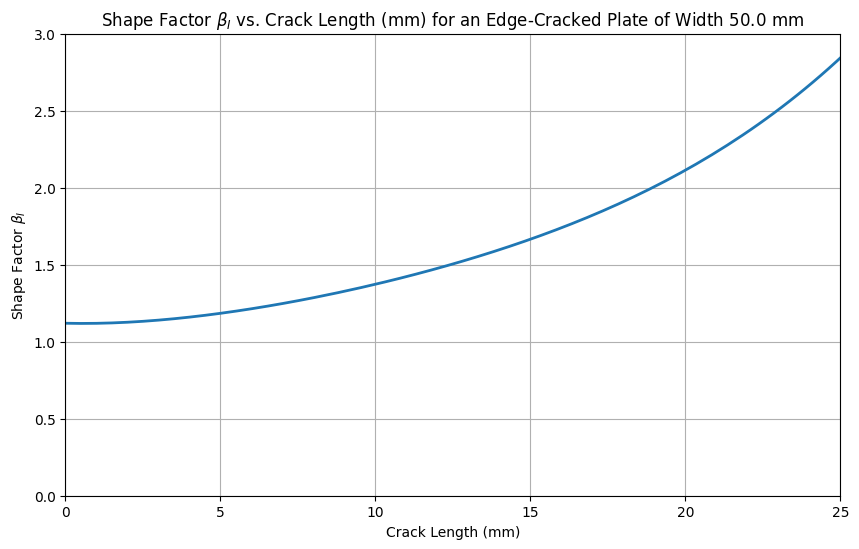

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set a constant value for b (e.g., b = 50 mm)
b = 50.0

# Generate a range of a values from 0 to b
a = np.linspace(0, b, 200)

# Compute a/b ratio
a_over_b = a / b

# Compute beta_I using the given equation
beta_I = 1.12 - 0.23 * a_over_b + 10.6 * a_over_b**2 - 21.7 * a_over_b**3 + 30.4 * a_over_b**4

# Fit a 4th-degree polynomial to the data
coeffs = np.polyfit(a, beta_I, deg=4)
poly_fit = np.poly1d(coeffs)
beta_fit = poly_fit(a)

# Plot the original beta_I and the polynomial fit
plt.figure(figsize=fig_size)
plt.plot(a, beta_I, label=r'$\beta_I$ (Original)', lw=2)
#plt.plot(a, beta_fit, label='Polynomial Fit', linestyle='--', lw=2)
plt.xlabel('Crack Length (mm)')
plt.ylabel(r'Shape Factor $\beta_I$')
plt.title(r'Shape Factor $\beta_I$ vs. Crack Length (mm) for an Edge-Cracked Plate of Width {:.1f} mm'.format(b))
plt.grid(True)
plt.ylim(0, 3)
plt.xlim(0, 25)
#plt.yticks(np.arange(1.1, 1.5, 0.1))
#plt.legend()
plt.savefig("plots/shape_factor.png", dpi=300, bbox_inches='tight')
plt.show()


In [14]:
plot_configs_crack = [
    {
        "title": "J-integral ($N\ mm^{-1}$) vs. Crack Length ($mm$) for 2D and 3D Models, Using Domain 4 Data",
        "y_ana": "j_integral_value_analytical",
        "y_cal": "j_integral_value_calculated",
        "y_err": "j_integral_error_percentage",
        "ylabel": "J-integral ($N\ mm^{-1}$)",
        "ylim": (0, 100),
        "yticks": np.arange(0, 120, 20),
        "filename": "j_integral_vs_crack_length.png"
    },
    {
        "title": "Stress Intensity Factor ($MPa\ \sqrt{mm}$) vs. Crack Length ($mm$) for 2D and 3D Models, Using Domain 4 Data",
        "y_ana": "stress_intensity_factor_value_analytical",
        "y_cal": "stress_intensity_factor_value_calculated",
        "y_err": "stress_intensity_factor_error_percentage",
        "ylabel": "Stress Intensity Factor ($MPa\ \sqrt{mm}$)",
        "ylim": (0, 2600),
        "yticks": np.arange(0, 3000, 500),
        "filename": "sif_vs_crack_length.png"
    }
]

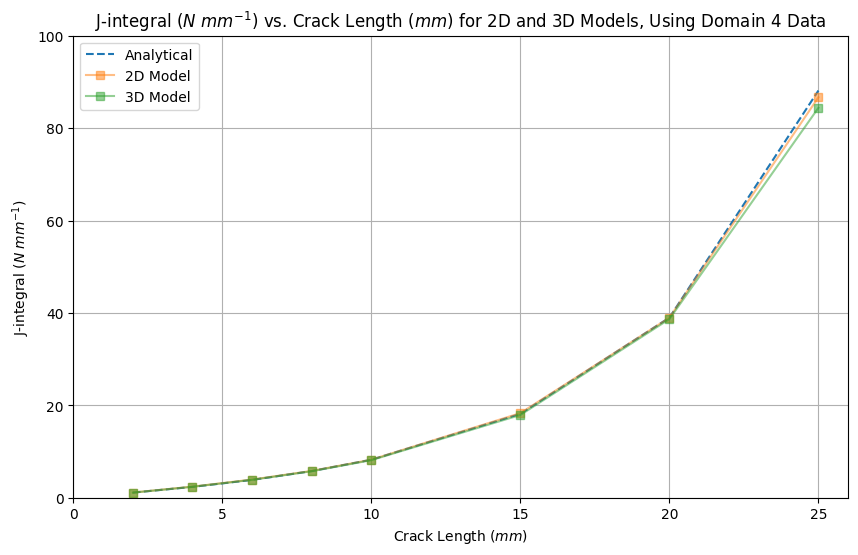

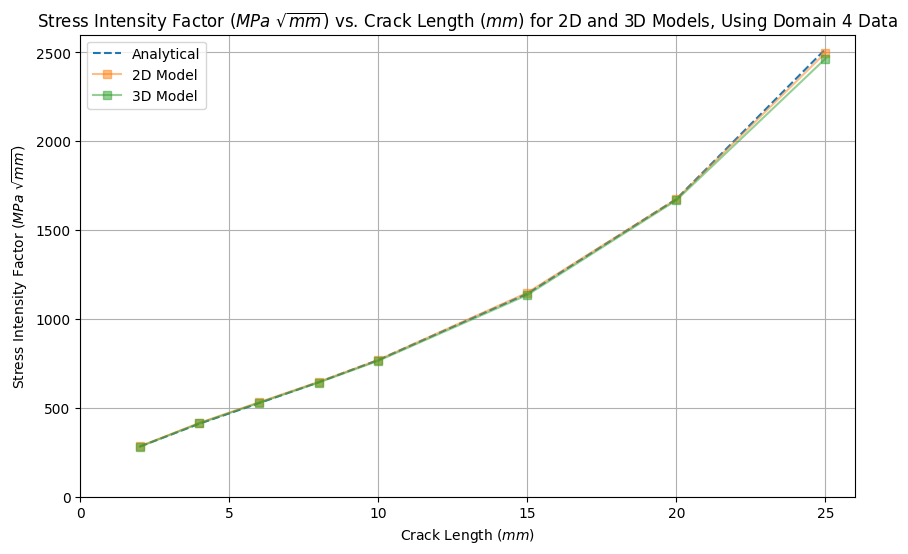

In [15]:
degrees = (4, 4)

i = 0

for config in plot_configs_crack:

    
    plt.figure(figsize=fig_size)
    
    x_2d = df_crack_2d["crack_length_mm"].values
    x_3d = df_crack_3d["crack_length_mm"].values

    sort_idx_2d = np.argsort(x_2d)
    sort_idx_3d = np.argsort(x_3d)

    x_2d = x_2d[sort_idx_2d]    
    x_3d = x_3d[sort_idx_3d]

    y_ana    = df_crack_2d[config["y_ana"]].values[sort_idx_2d]
    y_cal_2d = df_crack_2d[config["y_cal"]].values[sort_idx_2d]
    y_cal_3d = df_crack_3d[config["y_cal"]].values[sort_idx_3d]
        
    plt.plot(x_2d, y_ana, linestyle="--", label="Analytical")
    plt.plot(x_2d, y_cal_2d, marker="s", alpha=0.5, linestyle="-", label="2D Model")
    plt.plot(x_3d, y_cal_3d, marker="s", alpha=0.5, linestyle="-", label="3D Model")
    
    degree = degrees[i]
    coeffs = np.polyfit(x_2d, y_ana, degree)
    poly_fit = np.poly1d(coeffs)
    
    x_fit = np.linspace(0, 25, 300)
    y_ana_fit = poly_fit(x_fit)
    #plt.plot(x_fit, y_ana_fit, label=f"Polynomial Fit (Degree {degrees[i]})", linestyle=":", lw=2)

    plt.xlabel("Crack Length ($mm$)")
    plt.xticks(np.arange(0, 26, 5))
    plt.xlim(0, 26)
    plt.ylabel(config["ylabel"])
    plt.title(config["title"])
    plt.ylim(config["ylim"])
    plt.yticks(config["yticks"])
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.savefig(f"plots/{config['filename']}", dpi=300, bbox_inches='tight')
    plt.show()
    i+=1